## <center> *Probability Theory and Mathematical Statistics*
## <center> *Labwork №5*
    
    
<p style="text-align: right;"> completed by: Viktoriia Nemyrovska </p>
<p style="text-align: right;"> group: DA-01 </p>

=========================================================================================================================
## ***Task №1***

Conduct a preliminary analysis of the sample. This includes a statistical series (for continuous distributions – an interval series), the empirical distribution function (for continuous distributions – an interval function), its graph, a frequency polygon (for discrete distributions), and a histogram (for continuous distributions).

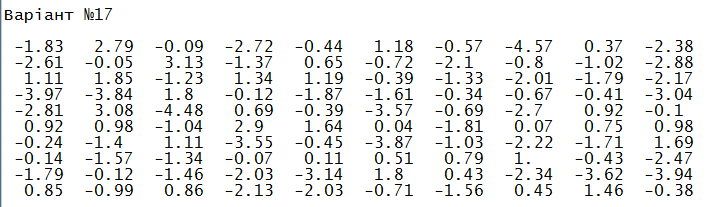

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math as math

pd.set_option('display.max_rows', 100)

Build the variation series
$$
x_{(1)}\leq x_{(2)}\leq \ldots\leq x_{(n)}.
$$

In [3]:
data_list = []
with open('data.txt', 'r', encoding = 'utf-8') as file:
    for line in file:
        val = [float(i) for i in line.split()]
        data_list = data_list + val
        
data_table = pd.DataFrame({"Initial data":  data_list,
                           "Variation series": sorted(data_list)})
data_table

,Initial data,Variation series
0,-1.83,-4.57
1,2.79,-4.48
2,-0.09,-3.97
3,-2.72,-3.94
4,-0.44,-3.87
5,1.18,-3.84
6,-0.57,-3.62
7,-4.57,-3.57
8,0.37,-3.55
9,-2.38,-3.14


## <center> *Interval Statistical Distribution*

Let's find the sample size $n$, its minimum and maximum elements, and the range
 $$ x_{(1)} = \min_{1\leq k\leq n} x_k,\ x_{(n)} = \max_{1\leq k\leq n} x_k,\ R = x_{(n)}-x_{(1)} $$
    
We will divide the sample values into m classes. To choose the number of classes m, we apply Sturges' formula. $$ m = 1 + [log_2 n] $$

We will take equal class widths, so the class width can be calculated using the formula $$ h = \frac{x_{(n)} - x_{(1)}}{m} $$

Now, the table with the sample information will look as follows:


In [4]:
data_info = pd.DataFrame({"Sample size":        [len(data_list)],
                          "Minimum element":  [min(data_list)],
                          "Maximum element": [max(data_list)],
                          "Range of the sample":       [max(data_list)-min(data_list)]})
data_info["Number of classes"] = 1 + np.floor(np.log2(data_info.loc[0]["Sample size"]))
data_info["Class width"]     = data_info.loc[0]["Range of the sample"] / data_info.loc[0]["Number of classes"]
      
data_info

,Sample size,Minimum element,Maximum element,Range of the sample,Number of classes,Class width
0,100,-4.57,3.13,7.7,7.0,1.1


We will construct an interval statistical distribution of the population.

In [5]:
# x1 - the first element of the variation series
#  m - the number of classes
#  h - the class width
#  v - the array of the variation series
x1 = data_table.loc[0]["Variation series"]
m = int(data_info.loc[0]["Number of classes"])
h = data_info.loc[0]["Class width"]
v = np.array(sorted(data_list))

# finding the class boundaries
endpoints = [np.around(x1 + i*h, decimals=2) for i in range(m + 1)]

# filling in the values of the class intervals' lower and upper boundaries
classes = [f'[{endpoints[i]}, {endpoints[i+1]})' for i in range(m - 1)]
classes.append(f'[{endpoints[m-1]}, {endpoints[m]}]')

# finding the class midpoints
middle = [np.around(0.5*(endpoints[i] + endpoints[i+1]), decimals=2) for i in range(m)]

# finding the frequencies of elements falling into the corresponding classes
freq = [v[(endpoints[i] <= v) & (v < endpoints[i+1])].size for i in range(m-1)]
freq.append(v[(endpoints[m-1] <= v) & (v <= endpoints[m])].size)
freq = np.array(freq)

# forming the interval statistical distribution table
data_stat_distr = pd.DataFrame({"Classes": classes,
                                "Class midpoints": middle,
                                "Frequencies": freq,
                                "Cumulative frequencies": freq.cumsum(),
                                "Relative frequencies": freq / len(data_list),
                                "Cumulative relative frequencies": freq.cumsum() / len(data_list)})
data_stat_distr

,Classes,Class midpoints,Frequencies,Cumulative frequencies,Relative frequencies,Cumulative relative frequencies
0,"[-4.57, -3.47)",-4.02,9,9,0.09,0.09
1,"[-3.47, -2.37)",-2.92,9,18,0.09,0.18
2,"[-2.37, -1.27)",-1.82,22,40,0.22,0.40
3,"[-1.27, -0.17)",-0.72,20,60,0.20,0.60
4,"[-0.17, 0.93)",0.38,22,82,0.22,0.82
5,"[0.93, 2.03)",1.48,14,96,0.14,0.96
6,"[2.03, 3.13]",2.58,4,100,0.04,1.00


## <center> *Empirical Distribution Function*

We will construct the empirical distribution function based on the interval statistical distribution.
    
$$
    F_n^*(x)=\left\{
    \begin{array}{ll}
    0, & x\leq -4.57, \\
    0.09, & -4.57 < x\leq -3.47, \\
    0.18, & -3.47 < x\leq -2.37, \\
    0.40, & -2.37 < x\leq -1.27, \\
    0.60, & -1.27 < x\leq -1.07, \\
    0.82, & -1.07 < x\leq 0.93, \\
    0.96, & 0.93 < x\leq 2.03, \\
    1, & x > 2.03, \\
    \end{array}\right.
$$

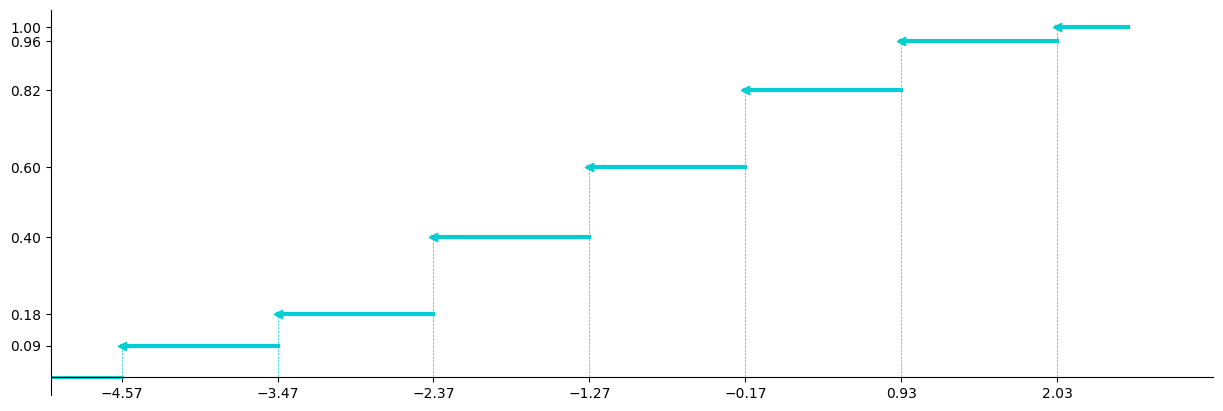

In [6]:
def plot_empirical_cdf(x, y):
    plt.plot([x[0] - 0.5, x[0]], [0, 0], linewidth=2, color="darkturquoise")
    for i in range(len(x)-1):
        plt.plot([x[i], x[i+1]], [y[i], y[i]], linewidth=3, color="darkturquoise")
        plt.scatter(x[i], y[i], marker="<", color="darkturquoise")
        plt.vlines(x[i], ymin=0, ymax=y[i], linewidth=0.5, color="darkturquoise", linestyles="dashed")
    plt.plot([x[len(x)-1], x[len(x)-1] + 0.5], [1, 1], linewidth=3, color="darkturquoise")
    plt.scatter(x.max(), 1, marker="<", color="darkturquoise")
    plt.vlines(x.max(), ymin=0, ymax=1, linewidth=0.5, color="darkturquoise", linestyles="dashed")
    plt.show()
    
endpoints = np.array(endpoints)

fig, ax = plt.subplots(figsize = (15, 5))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.set_xlim(endpoints.min() - 0.5, endpoints.max())
ax.set_xticks(endpoints[:-1])
ax.set_yticks(data_stat_distr["Cumulative relative frequencies"])

plot_empirical_cdf(endpoints[:-1], data_stat_distr["Cumulative relative frequencies"])

## <center> *Histogram of Adjusted Relative Frequencies*
    
To ensure that the histogram approximates the density of the population distribution, we will build a histogram of adjusted relative frequencies. The height of the bars is determined as: $$ h_k = \frac{\nu_k}{l(\Delta_k)}, $$ where $\nu_k$ is the relative frequency, and $l(\Delta_k)$ is the length of the interval.

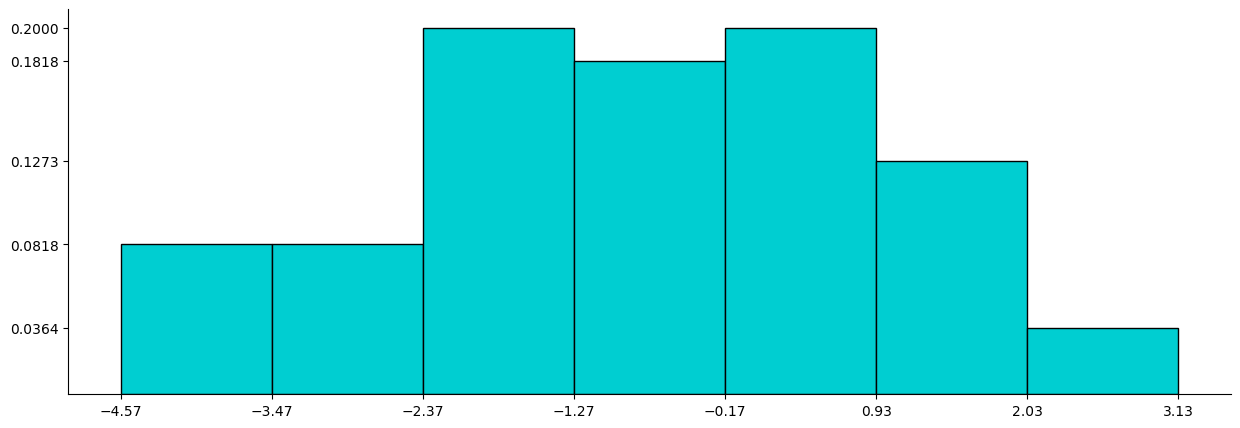

In [7]:
h_arr = [data_stat_distr.loc[i]["Relative frequencies"]/h for i in range (m)]
h_arr = np.unique(h_arr)

fig, ax = plt.subplots(figsize = (15, 5))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.set_xticks(endpoints)
ax.set_yticks(h_arr)

ax.hist(data_table["Variation series"], bins = m, density = True, color = "darkturquoise", edgecolor = "black")
plt.show()

Based on the constructed empirical distribution function and histogram, one can visually hypothesize that the given population follows a normal distribution. First, on the empirical distribution function, larger jumps in cumulative frequencies are observed in the center of the graph than at the ends. Secondly, the histogram of adjusted relative frequencies visually resembles the well-known normal distribution the most.

=========================================================================================================================


## ***Task №2***

Find the sample mean, sample variance, corrected sample variance, sample median, sample mode, and the sample coefficients of skewness and kurtosis.

## <center> *Measures of Central Tendency*

We will calculate the *sample mean* for grouped data. To do this, we will use the formula: 
$$ \bar x = \frac 1n \sum_{i=1}^{m}n_ix_i^*=\sum_{i=1}^{m}\nu_ix_i^* $$

In [8]:
# сalculating the sample mean from the sample using the library function mean
data_char = pd.DataFrame({"Sample mean (from sample)": [np.mean(data_table["Variation series"])]})

# сalculating the sample mean using the interval statistical distribution (ISD) with the corresponding formula and known data
data_char["Sample mean (from ISD)"] = np.sum(data_stat_distr["Relative frequencies"] * data_stat_distr["Class midpoints"])

We will calculate the *sample median* for grouped data. To do this, we will use the following formula:

$$ Me^*\xi = y_{me-1}+h \cdot \frac {\frac n2 - n_{me-1}^*}{n_{me}}, $$

where $me$ is the class number that contains the element corresponding to the median, $h$ is the class width, $y_{me-1}$ and $n_{me}$ are the lower boundary and frequency of the class containing the median.

To determine the class that contains the element corresponding to the median, we use the following inequalities

$$ n_{me-1}^* < \frac n2,\ n_{me}^* \geq \frac n2 , $$
where $n_k^*$ is the cumulative frequency of the $k$-th class.

In [9]:
# calculating the sample median from the sample using the built-in median function
data_char["Sample median (from sample)"] = np.median(data_table["Variation series"])

# calculating the sample median using the interval statistical distribution (ISD) with the corresponding formula and known data
me = data_stat_distr["Cumulative frequencies"][data_stat_distr["Cumulative frequencies"] < len(data_list)/2].size
if me == 0:
    data_char["Sample median (from ISD)"] = endpoints[me] + h * (len(data_list)/2) / data_stat_distr["Frequencies"][me]
else:
    data_char["Sample median (from ISD)"] = endpoints[me] + h * (len(data_list)/2 - data_stat_distr["Cumulative frequencies"][me-1]) / data_stat_distr["Frequencies"][me]

We will calculate the *sample mode* using the following expression

$$ Mo^*\xi = y_{mo-1} + h \cdot \frac{n_{mo} - n_{mo-1}}{(n_{mo} - n_{mo-1}) + (n_{mo} - n_{mo+1})}, $$

where $y_{mo-1}$ is the lower boundary of the modal class, and $n_{mo},\ n_{mo-1},\ n_{mo+1}$ are the frequencies of the modal, pre-modal, and post-modal classes.

In [10]:
# calculating the sample mode using the corresponding formula and known data
mo = np.argwhere(data_stat_distr["Frequencies"].tolist() == np.amax(data_stat_distr["Frequencies"]))

for i in range (len(mo)):
    if mo[i] == 0:
        data_char["Sample mode " + str(i+1)] = endpoints[mo[i]] + h * freq[mo[i]] / (2*freq[mo[i]] - freq[mo[i]+1])
    elif mo[i] == m-1:
        data_char["Sample mode " + str(i+1)] = endpoints[mo[i]] + h * (freq[mo[i]] - freq[mo[i]-1]) / (2*freq[mo[i]] - freq[mo[i]-1])
    else:
        data_char["Sample mode " + str(i+1)] = endpoints[mo[i]] + h * (freq[mo[i]] - freq[mo[i]-1]) / (2*freq[mo[i]] - freq[mo[i]-1] - freq[mo[i]+1])
    
    
data_char

,Sample mean (from sample),Sample mean (from ISD),Sample median (from sample),Sample median (from ISD),Sample mode 1,Sample mode 2
0,-0.7382,-0.775,-0.62,-0.72,-1.416667,0.05


## <center> *Measures of Dispersion*

We will calculate the *sample variance* and *corrected sample variance*.
For grouped data, we will use the following formulas:
$$ \mathbb{D}_{\xi}^{**} = \sum_{i=1}^m \nu_i (x_i^* - \bar x)^2 $$ $$ \mathbb{D}_{\xi}^{***} = \frac{n}{n-1} \sum_{i=1}^m \nu_i (x_i^* - \bar x)^2 $$

In [11]:
# calculating the sample variance from the sample using the built-in var function
data_char["Sample variance (from sample)"] = np.var(data_table["Variation series"])
# calculating the sample variance using the interval statistical distribution (ISD) with the described formula and known data
data_char["Sample variance (from ISD)"] = np.sum(data_stat_distr["Relative frequencies"] * (data_stat_distr["Class midpoints"] - data_char.loc[0]["Sample mean (from ISD)"]) ** 2)

# calculating the corrected sample variance from the sample using the built-in var function
data_char["Corrected sample variance (from sample)"] = np.var(data_table["Variation series"], ddof=1)
# calculating the corrected sample variance using the interval statistical distribution (ISD) with the described formula and known data
data_char["Corrected sample variance (from ISD)"] = len(data_list)/(len(data_list)-1) * data_char["Sample variance (from ISD)"]

data_char

,Sample mean (from sample),Sample mean (from ISD),Sample median (from sample),Sample median (from ISD),Sample mode 1,Sample mode 2,Sample variance (from sample),Sample variance (from ISD),Corrected sample variance (from sample),Corrected sample variance (from ISD)
0,-0.7382,-0.775,-0.62,-0.72,-1.416667,0.05,3.064197,3.058275,3.095148,3.089167


## <center> *Measures of Shape*

To characterize the symmetry of the data distribution, we will calculate the *sample skewness coefficient*:
$$ As^*\xi = \frac{\mu_{3,0}^*}{(\sigma_{\xi}^{***})^3} $$

To characterize the degree of peakedness, we will calculate the *sample kurtosis coefficient*:
$$ Ex^*\xi = \frac{\mu_{4,0}^*}{(\sigma_{\xi}^{***})^4} - 3 $$

Where $\mu_{k,0}^*$ is the *sample central moment* of the $k$-th order.\
For grouped data, the sample central moment will be calculated as follows:
$$ \mu_{k,0}^* = \frac 1n \sum_{i=1}^{m}n_i(x_i^* - \bar x)^k =\sum_{i=1}^{m}\nu_i(x_i^* - \bar x)^k $$

In [12]:
# calculating the sample skewness coefficient from the sample using the built-in skew function
data_char["Sample skewness coefficient (from sample)"] = stats.skew(data_table["Variation series"])
# calculating the sample skewness coefficient using the interval statistical distribution (ISD) with the described formulas
mu_3 = np.sum(data_stat_distr["Relative frequencies"] * (data_stat_distr["Class midpoints"] - data_char.loc[0]["Sample mean (from ISD)"]) ** 3)
data_char["Sample skewness coefficient (from ISD)"] = mu_3 / ((data_char["Corrected sample variance (from ISD)"])**(3/2))

# calculating the sample kurtosis coefficient from the sample using the built-in kurtosis function
data_char["Sample kurtosis coefficient (from sample)"] = stats.kurtosis(data_table["Variation series"])
# calculating the sample kurtosis coefficient using the interval statistical distribution (ISD) with the described formulas
mu_4 = np.sum(data_stat_distr["Relative frequencies"] * (data_stat_distr["Class midpoints"] - data_char.loc[0]["Sample mean (from ISD)"]) ** 4)
data_char["Sample kurtosis coefficient (from ISD)"] = mu_4 / ((data_char["Corrected sample variance (from ISD)"])**2) - 3

data_char

,Sample mean (from sample),Sample mean (from ISD),Sample median (from sample),Sample median (from ISD),Sample mode 1,Sample mode 2,Sample variance (from sample),Sample variance (from ISD),Corrected sample variance (from sample),Corrected sample variance (from ISD),Sample skewness coefficient (from sample),Sample skewness coefficient (from ISD),Sample kurtosis coefficient (from sample),Sample kurtosis coefficient (from ISD)
0,-0.7382,-0.775,-0.62,-0.72,-1.416667,0.05,3.064197,3.058275,3.095148,3.089167,-0.052196,-0.139914,-0.498964,-0.775696


=========================================================================================================================


## ***Task №3***

Justify and present (a new) hypothesis about the distribution of the population.

Considering the newly obtained data, we will revise the hypothesis about the population distribution.

***1.*** Let $\xi \simeq U(a,b)$, then 
$$
f_{\xi}(x) = \left\{
    \begin{array}{ll}
    \frac{1}{b-a}, & x\in [a, b], \\
    0, & x\notin [a, b] \\
    \end{array}\right.
$$

From the known data, we can assume that $a=-4.57,\ b=3.13$. We will write the probability density function.

$$
f_{\xi}(x) = \left\{
    \begin{array}{ll}
    \frac{1}{7.7}, & x\in [-4.57, 3.13], \\
    0, & x\notin [-4.57, 3.13] \\
    \end{array}\right.
$$

For the uniform distribution: $ \mathbb E\xi = \frac{a+b}{2}=-0.72,\ \mathbb D\xi = \frac{(b-a)^2}{12} $

Now, let's calculate the skewness coefficient:

$ As\xi=\frac{\mu_3(\xi)}{\sigma_{\xi}^3} $

$ \mu_3(\xi) = \int_{-\infty}^{+\infty} (x - \mathbb E\xi)^3 f_{\xi}(x)dx = \int_{-4.57}^{3.13} (x + 0.72)^3 \cdot \frac{1}{7.7}dx = 0 \Rightarrow As\xi=0$


Now, let's calculate the kurtosis coefficient:

$ Ex\xi=\frac{\mu_4(\xi)}{\sigma_{\xi}^4}-3 $

$ \mu_4(\xi) = \int_{-\infty}^{+\infty} (x - \mathbb E\xi)^4 f_{\xi}(x)dx = \int_{-4.57}^{3.13} (x + 0.72)^4 \cdot \frac{1}{7.7}dx = 43.9413 $

$ \sigma_{\xi}^4 = (\frac{(b-a)^2}{12})^2 = \frac{7.7^4}{144} = 24.4118 $

From here, we get that:

$ Ex\xi=\frac{43.9413}{24.4118}-3 = -1.2 $

Then, for the uniform distribution $As\xi = 0,\ Ex\xi = -1.2 $. 

***2.*** Let $\xi \simeq Exp(\lambda)$, then 
$$
f_{\xi}(x) = \left\{
    \begin{array}{ll}
    \lambda e^{-\lambda x}, & x\geq 0, \\
    0, & x < 0 \\
    \end{array}\right.
$$

It is known that $\mathbb E \xi = \frac 1\lambda = \bar x = -0.775$. $\lambda \approx -1.29. $

However, it is immediately clear that $\bar x < 0$, meaning that $\lambda < 0$, so the population cannot follow an exponential distribution.


***3.*** Let $\xi \simeq N(a,\ \sigma^2)$, then 
$$
f_{\xi}(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{- \frac{(x-a)^2}{2 \sigma^2}},\ x \in \mathbb R
$$

Then $a \approx \bar x = -0.775,\ \sigma^2 \approx \mathbb D_{\xi}^{***} = 3.058275$. For the normal distribution, the skewness and kurtosis coefficients should both be zero. $As\xi = 0,\ Ex\xi = 0$.

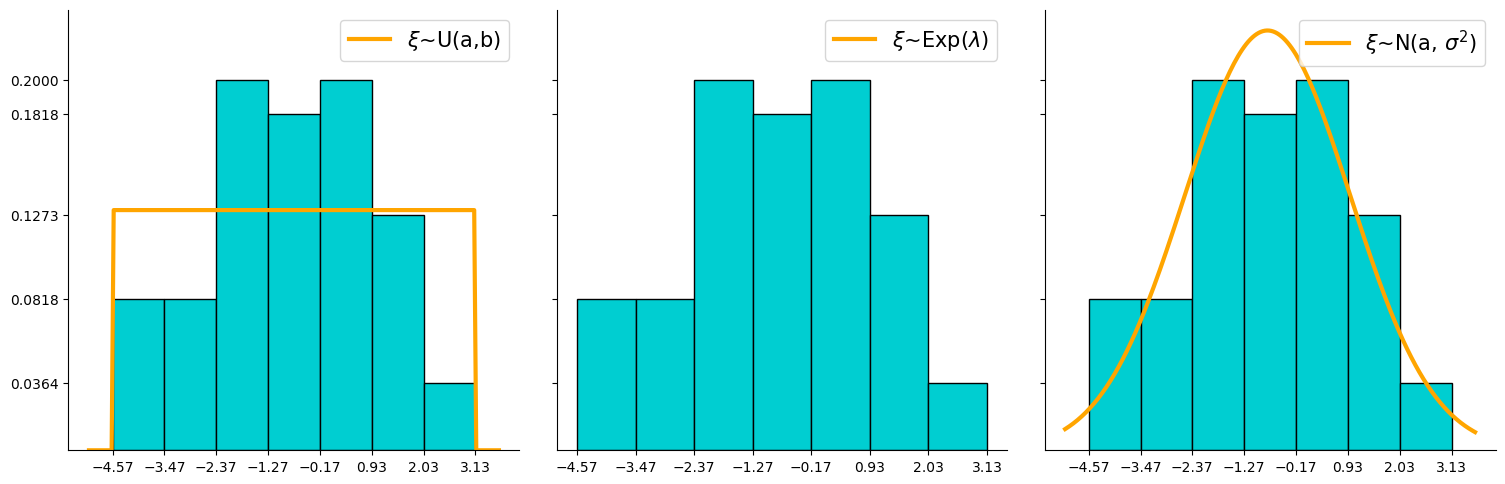

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
fig.tight_layout()
for i in range(3):
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_position("zero")
    ax[i].set_xticks(endpoints)
    ax[i].set_yticks(h_arr)
    
x = np.linspace(data_info.loc[0]["Minimum element"]-0.5, data_info.loc[0]["Maximum element"]+0.5, num=200)
y0 = stats.uniform.pdf(x, loc=data_info.loc[0]["Minimum element"], scale=data_info.loc[0]["Range of the sample"])
y1 = stats.expon.pdf(x, loc=0, scale=data_char.loc[0]["Sample mean (from ISD)"])
y2 = stats.norm.pdf(x, loc=data_char.loc[0]["Sample mean (from ISD)"], scale=math.sqrt(data_char.loc[0]["Corrected sample variance (from ISD)"]))


ax[0].hist(data_table["Variation series"], bins=m, density=True, color="darkturquoise", edgecolor="black")
ax[0].plot(x, y0, linewidth=3, color="orange", label=r"$\xi$~U(a,b)")
ax[0].legend(fontsize=15)

ax[1].hist(data_table["Variation series"], bins=m, density=True, color="darkturquoise", edgecolor="black")
ax[1].plot(x, y1, linewidth=3, color="orange", label=r"$\xi$~Exp($\lambda$)")
ax[1].legend(fontsize=15)

ax[2].hist(data_table["Variation series"], bins=m, density=True, color="darkturquoise", edgecolor="black")
ax[2].plot(x, y2, linewidth=3, color="orange", label=r"$\xi$~N(a, $\sigma^2$)")
ax[2].legend(fontsize=15)

plt.show()

## ***Conclusion***
The distribution is continuous and multimodal.

We can immediately discard the possibility of an exponential distribution, as the sample mean is less than zero (which is why the graph is not shown). Moreover, the sample contains negative values.

If we consider the graphs of the normal distribution function and the histogram, we can see that they fit reasonably well. Additionally, the sample skewness coefficient is close to zero, which may indicate a normal distribution. However, on the other hand, the sample kurtosis coefficient is equally close to both the expected value for a normal distribution and the expected value for a uniform distribution. Although the task specifies that the chosen population distributions can only be normal or exponential, we cannot rule out the hypothesis that the distribution is uniform.

Therefore, the expectation for a normal distribution of the population has been confirmed, but a hypothesis about a uniform distribution has also emerged.

=========================================================================================================================


## ***Task №4***
Using the method of moments and the method of maximum likelihood, find the estimates of the distribution parameters.

## <center> *Moment Method*
    
We will perform the parameter estimation of the population using the *method of moments* for two hypotheses:

***1.*** $\xi \simeq U(a,b),\ \vec \theta = (a, b)$

Since for the uniform distribution, $ \mathbb E\xi = \frac{a+b}{2},\ \mathbb D\xi = \frac{(b-a)^2}{12} $, and with $\bar \xi$ being the sample mean (from ISD) and $\mathbb D_{\xi}^{**}$ being the sample variance (from ISD), we can form a system of equations:

$
\left\{
    \begin{array}{ll}
    \frac{a^* + b^*}{2} = \bar \xi \\
    \frac{(b^* - a^*)^2}{12} = \mathbb D_{\xi}^{**} \\
    \end{array}\right. \Rightarrow
$
$
\left\{
    \begin{array}{ll}
    a^* + b^* = 2\bar \xi \\
    b^* - a^* = \sqrt{12\mathbb D_{\xi}^{**}} \\
    \end{array}\right. \Rightarrow
$
$
\left\{
    \begin{array}{ll}
    a^* = \bar \xi - \sqrt{3\mathbb D_{\xi}^{**}} \\
    b^* = \bar \xi + \sqrt{3\mathbb D_{\xi}^{**}} \\
    \end{array}\right.
$

From this, with the known values of the sample mean and sample variance, we can calculate:

$a^* = -0.775 - \sqrt{3 \cdot 3.058275} = -3.804$

$b^* = -0.775 + \sqrt{3 \cdot 3.058275} = 2.254$

It can immediately be noticed that this interval does not cover the entire sample.

***2.*** $\xi \simeq N(a,\sigma^2),\ \vec \theta = (a, \sigma^2)$

Since for the normal distribution $ \mathbb E\xi = a,\ \mathbb D\xi = \sigma^2 $ , and with $\bar \xi$ being the sample mean (from ISD) and $\mathbb D_{\xi}^{**}$ being the sample variance (from ISD), it is immediately clear that:

$a^* = \bar \xi = -0.775$

$(\sigma^2)^* = \mathbb D_{\xi}^{**} = 3.058275$

## <center> *Maximum Likelihood Method*
    
Again, we consider two hypotheses regarding the population distribution and perform parameter estimation for these distributions using the *maximum likelihood method*.

***1.*** $\xi \simeq U(a,b),\ \vec \theta = (a, b)$

First, let's write the density function: 
$$
f_{\xi}(x_i;\ a, b) = \left\{
    \begin{array}{ll}
    \frac{1}{b-a}, & x_i \in [a, b] \\
    0 & x_i \notin [a, b] \\
    \end{array}\right.
$$

Then, the likelihood function is expressed as: 
$$
L(x_1,\ x_2, ... x_n;\ a, b) = \prod_{i=1}^n f_{\xi}(x_i;\ a, b) = \left\{
    \begin{array}{ll}
    (\frac{1}{b-a})^n, & for\ all\ x_i \in [a, b] \\
    0, & if\ any\ x_i \notin [a, b] \\
    \end{array}\right.
$$

After analysis, it can be stated that this likelihood function achieves its maximum value when the denominator $b-a$ is minimized, and all values of the observations $x_i$ must fall within this range. Therefore, the smallest interval that satisfies this condition will be $[a^*,b^*]$, where $a^* = \min_{1\leq i\leq n} (x_i),\ b^* = \max_{1 \leq i \leq n} (x_i)$.


***2.*** $\xi \simeq N(a,\sigma^2),\ \vec \theta = (a, \sigma^2)$

Now, let's write the density function for the given distribution:
$$ f_{\xi}(x_i;\ a, b) = \frac{1}{\sigma \sqrt{2\pi}} \cdot e^{-\frac{(x_i-a)^2}{2 \sigma^2}} $$

Thus, the likelihood function is expressed as:
$$ L(x_1,\ x_2, ... x_n;\ a, b) = \prod_{i=1}^n f_{\xi}(x_i;\ a, \sigma^2) = (\frac{1}{\sigma\sqrt{2 \pi}})^n \cdot e^{-\frac{1}{2 \sigma^2}\sum_{i=1}^n (x_i - a)^2} $$

We should log-transform the resulting function for easier handling. Since the logarithm is a monotonic function, the log-transformed function will have its maximum at the same points as the original.

Let's proceed with the calculations.

$$
\ln L = n \cdot \ln{|\frac{1}{\sigma \sqrt{2\pi}}|} + \ln(e^{-\frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - a)^2}) = \frac n2 \cdot \ln{\frac{1}{2\pi\sigma^2}} - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - a)^2
$$

To find the critical point for the parameter $a$, we will take the first partial derivative:

$ \frac{\partial}{\partial a} \ln L = -\frac{1}{2\sigma^2} \frac{\partial}{\partial a} \sum_{i=1}^n (x_i - a)^2 = -\frac{1}{2\sigma^2} \sum_{i=1}^n -2(x_i - a) = \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - a) $

We equate it to zero and obtain:

$ \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - a) = 0 $

$ -na + \sum_{i=1}^n x_i = 0 $

$ a = \frac1n \sum_{i=1}^n x_i  $

It can be observed that the resulting value is the sample mean $ a^* = \bar \xi $.

Next, let's find the critical point for the parameter $\sigma^2$ by taking the first partial derivative:

$ \frac{\partial}{\partial \sigma^2} \ln L = \frac{\partial}{\partial \sigma^2} (\frac n2 \cdot \ln{\frac{1}{2\pi}} - \frac n2 \ln{\sigma^2} - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - a)^2) = - \frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^n (x_i - a)^2 $

Equating it to zero:

$ - \frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^n (x_i - a)^2 = 0 $

$ \frac{n}{2\sigma^2} = \frac{1}{2(\sigma^2)^2}\sum_{i=1}^n (x_i - a)^2 $

$ \sigma^2 = \frac1n \sum_{i=1}^n (x_i - a)^2  $

Since $ a^* = \bar \xi $, we have $ (\sigma^2)^* = \frac1n \sum_{i=1}^n (x_i - a^*)^2 = \frac1n \sum_{i=1}^n (x_i - \bar \xi)^2 = \mathbb D_{\xi}^{**} $

We will now check that the critical point we found is indeed a minimum. To do this, we compute the second partial derivatives and write the Hessian matrix.

$ \frac{\partial^2}{\partial a^2} \ln L = \frac{\partial}{\partial a} \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - a) = - \frac{n}{\sigma^2} $;

$ \frac{\partial^2}{\partial a \partial \sigma^2} \ln L = \frac{\partial}{\partial \sigma^2} \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - a) = 0 $;

$ \frac{\partial^2}{\partial (\sigma^2)^2} \ln L = \frac{\partial}{\partial \sigma^2} (- \frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^n (x_i - a)^2) = \frac{n}{2(\sigma^2)^2} - \frac{1}{(\sigma^2)^3}\sum_{i=1}^n (x_i - a)^2 $.

Substituting the critical points, we obtain:

$
H(\ln L) = \begin{pmatrix}
- \frac{n}{\mathbb D_{\xi}^{**}} & 0 \\
0 & \frac{n}{2(\mathbb D_{\xi}^{**})^2} - \frac{1}{(\mathbb D_{\xi}^{**})^3}\sum_{i=1}^n (x_i - \bar \xi)^2
\end{pmatrix} = 
$
$
\begin{pmatrix}
- \frac{n}{\mathbb D_{\xi}^{**}} & 0 \\
0 & \frac{n}{2(\mathbb D_{\xi}^{**})^2} - \frac{n}{(\mathbb D_{\xi}^{**})^3}\frac 1n \sum_{i=1}^n (x_i - \bar \xi)^2
\end{pmatrix} = 
$

$
= \begin{pmatrix}
- \frac{n}{\mathbb D_{\xi}^{**}} & 0 \\
0 & \frac{n}{2(\mathbb D_{\xi}^{**})^2} - \frac{2n\mathbb D_{\xi}^{**}}{2(\mathbb D_{\xi}^{**})^3}
\end{pmatrix} = 
$
$
\begin{pmatrix}
- \frac{n}{\mathbb D_{\xi}^{**}} & 0 \\
0 & -\frac{n}{2(\mathbb D_{\xi}^{**})^2}
\end{pmatrix}
$

This matrix is negative definite, so the likelihood function has a minimum at the parameter estimates $ a^* = \bar \xi $ та $ (\sigma^2)^* = \mathbb D_{\xi}^{**} $.

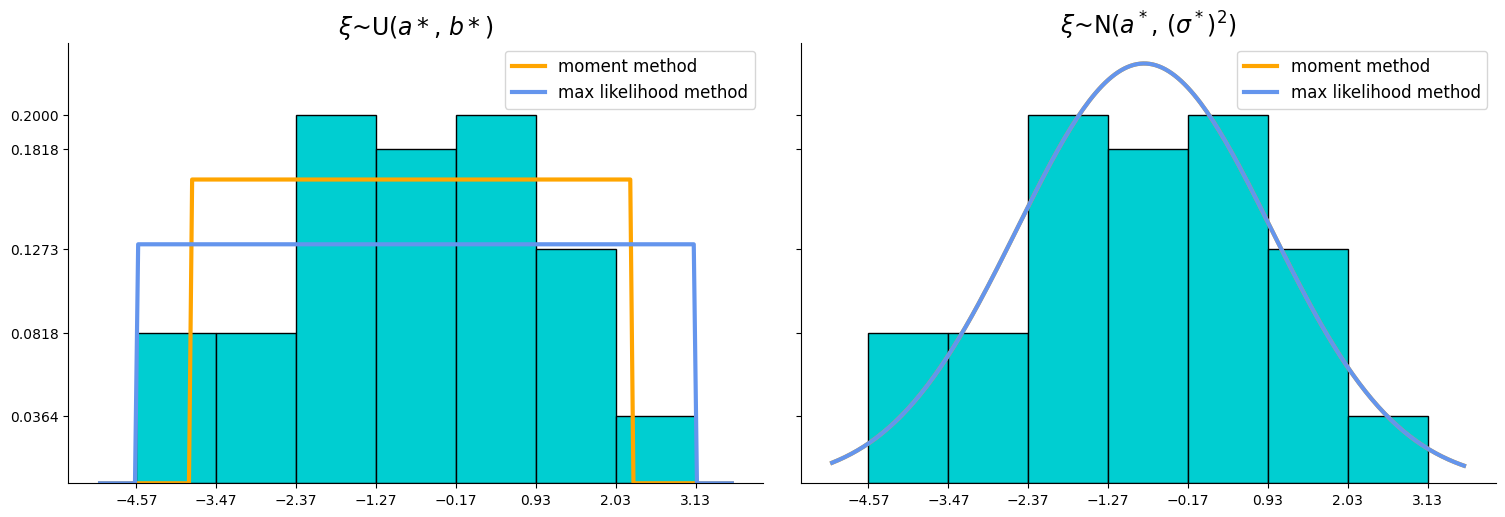

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
fig.tight_layout()

for i in range(2):
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_position("zero")
    ax[i].set_xticks(endpoints)
    ax[i].set_yticks(h_arr)
    
x = np.linspace(data_info.loc[0]["Minimum element"]-0.5, data_info.loc[0]["Maximum element"]+0.5, num=200)
y0 = stats.uniform.pdf(x, loc=-3.804, scale=2.254+3.804)
yy0 = stats.uniform.pdf(x, loc=data_info.loc[0]["Minimum element"], scale=data_info.loc[0]["Range of the sample"])
y1 = stats.norm.pdf(x, loc=data_char.loc[0]["Sample mean (from ISD)"], scale=math.sqrt(data_char.loc[0]["Sample variance (from ISD)"]))
yy1 = stats.norm.pdf(x, loc=data_char.loc[0]["Sample mean (from ISD)"], scale=math.sqrt(data_char.loc[0]["Sample variance (from ISD)"]))

ax[0].hist(data_table["Variation series"], bins=m, density=True, color="darkturquoise", edgecolor="black")
ax[0].plot(x, y0, linewidth=3, color="orange", label="moment method")
ax[0].plot(x, yy0, linewidth=3, color="cornflowerblue", label="max likelihood method")
ax[0].set_title(r"$\xi$~U($a*$, $b*$)", fontsize=17)
ax[0].legend(fontsize=12, loc="upper right")

ax[1].hist(data_table["Variation series"], bins=m, density=True, color="darkturquoise", edgecolor="black")
ax[1].plot(x, y1, linewidth=3, color="orange", label="moment method")
ax[1].plot(x, yy1, linewidth=3, color="cornflowerblue", label="max likelihood method")
ax[1].set_title(r"$\xi$~N($a^*$, $(\sigma^*)^2$)", fontsize=17)
ax[1].legend(fontsize=12, loc="upper right")

plt.show()

## ***Final Conclusion***

Based on the results, I still believe that the population follows a normal distribution. This is further confirmed by the parameter estimates for the distributions. For the normal distribution, we obtained identical values using both the moment method and the maximum likelihood method. The latter seems quite conclusive. Regarding the hypothesis of a uniform distribution, I believe it can be rejected, as the results obtained using the moment method differ significantly from those obtained by maximum likelihood estimation. Furthermore, the estimated parameters form an interval that does not include a significant portion of the data from the sample.